###### FOR INTERNAL REFERENCE ONLY (To be deleted before submission):
input files:
    1. train.csv
    2. test.csv
    3. test_labels.csv

output files:
    1. combined_data.csv

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import random

from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from PIL import Image

import seaborn as sns

In [2]:
# defining functions

def Show_Conditional_Probabilities(data, feature_list):
    for conditional_feature in feature_list:
        print("\nCalculating for {}...".format(conditional_feature))
        subdf = data[data[conditional_feature]==1]
        total = len(subdf)
        
        for given_feature in feature_list:
            if given_feature != conditional_feature:
                temp = subdf[subdf[given_feature]==1]
                count = len(temp)
                probability = count / total
                
                print("P({} | {})={}%"\
                      .format(given_feature, conditional_feature, round(probability*100, 1)))

def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(10, 100%%, %d%%)" % random.randint(20,50)

def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(125, 50%%, %d%%)" % random.randint(20, 50)

def Show_Wordcloud(data, color='green', title=None):
    sw = stopwords.words('english')
    
    mask = np.array(Image.open("cloud_mask.png"))
    wordcloud = WordCloud(background_color="white", 
                          max_words=30, 
                          mask=mask, 
                          stopwords=sw,
                          scale=3,
                          random_state=1).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    if color=='green':
        plt.imshow(wordcloud.recolor(color_func=green_color_func, random_state=3), interpolation="bilinear")
    elif color=='red':
        plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=3), interpolation="bilinear")
        
    plt.show()

In [3]:
# reading train file

train_df = pd.read_csv('train.csv', encoding='latin-1')
print(train_df.shape)
display(train_df.head())

(159571, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# reading test comments

test_comments = pd.read_csv('test.csv', encoding='latin-1')
print(test_comments.shape)
display(test_comments.head())

(153164, 2)


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
# reading test labels

test_labels = pd.read_csv('test_labels.csv', encoding='latin-1')
print(test_labels.shape)
display(test_labels.head())

(153164, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [6]:
# extracting only the test labels that do not have -1 (these can be used later to demonstrate model deployment)

test_labels = test_labels[(test_labels['toxic'] > -1) 
                          & (test_labels['severe_toxic'] > -1) 
                          & (test_labels['obscene'] > -1) 
                          & (test_labels['threat'] > -1) 
                          & (test_labels['insult'] > -1) 
                          & (test_labels['identity_hate'] > -1)]
print(test_labels.shape)
display(test_labels.head())

(63978, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0


In [7]:
# combine test comments and labels

test_df = pd.merge(test_comments, test_labels, on='id')
print(test_df.shape)
display(test_df.head())

(63978, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
1,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
2,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
3,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
4,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0


In [8]:
# combine whole data

df = pd.concat([train_df, test_df])
print(df.shape)
display(df.head())

(223549, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
# add a clean column

df['clean'] = np.where((df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df['insult'] + df['identity_hate']) == 0, 1, 0)
print(df.shape)
display(df.head())

(223549, 9)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [10]:
# check distributions

cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'clean']
total = len(df)

for col in cols:
    print("\nLabel : {}".format(col))
    col_count = len(df[df[col]==1])
    print("Percentage : {} %".format(round(100*col_count/total, 2)))
    print("Value Counts : \n{}".format(df[col].value_counts()))


Label : toxic
Percentage : 9.57 %
Value Counts : 
0    202165
1     21384
Name: toxic, dtype: int64

Label : severe_toxic
Percentage : 0.88 %
Value Counts : 
0    221587
1      1962
Name: severe_toxic, dtype: int64

Label : obscene
Percentage : 5.43 %
Value Counts : 
0    211409
1     12140
Name: obscene, dtype: int64

Label : threat
Percentage : 0.31 %
Value Counts : 
0    222860
1       689
Name: threat, dtype: int64

Label : insult
Percentage : 5.06 %
Value Counts : 
0    212245
1     11304
Name: insult, dtype: int64

Label : identity_hate
Percentage : 0.95 %
Value Counts : 
0    221432
1      2117
Name: identity_hate, dtype: int64

Label : clean
Percentage : 89.95 %
Value Counts : 
1    201081
0     22468
Name: clean, dtype: int64


##### Observations:<br> 
    The labels are highly imbalanced. Almost 90% of the comments are clean.

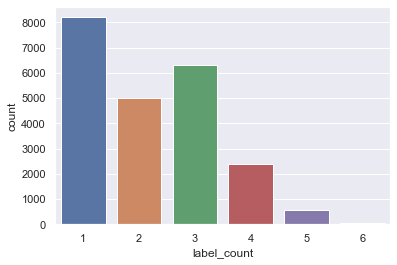

In [11]:
# get number of labels for un-clean comments

df['label_count'] = df['toxic'] + df['severe_toxic'] + df['obscene'] + df['insult'] + df['identity_hate'] + df['threat']


sns.set(style="darkgrid")
ax = sns.countplot(x='label_count', data=df[df['label_count'] > 0])

##### Observations:<br> 
    Most of the un-clean comments have only one label. Very few comments have all the labels.

In [12]:
# check conditional probabilities to see if any label is dependant on any other label

labels = ['toxic', 'severe_toxic', 'obscene', 'insult', 'identity_hate', 'threat']
Show_Conditional_Probabilities(df, labels)


Calculating for toxic...
P(severe_toxic | toxic)=9.2%
P(obscene | toxic)=54.0%
P(insult | toxic)=50.0%
P(identity_hate | toxic)=9.3%
P(threat | toxic)=3.1%

Calculating for severe_toxic...
P(toxic | severe_toxic)=100.0%
P(obscene | severe_toxic)=95.8%
P(insult | severe_toxic)=86.7%
P(identity_hate | severe_toxic)=22.8%
P(threat | severe_toxic)=8.1%

Calculating for obscene...
P(toxic | obscene)=95.2%
P(severe_toxic | obscene)=15.5%
P(insult | obscene)=73.2%
P(identity_hate | obscene)=12.9%
P(threat | obscene)=3.6%

Calculating for insult...
P(toxic | insult)=94.5%
P(severe_toxic | insult)=15.0%
P(obscene | insult)=78.6%
P(identity_hate | insult)=15.6%
P(threat | insult)=3.9%

Calculating for identity_hate...
P(toxic | identity_hate)=94.2%
P(severe_toxic | identity_hate)=21.2%
P(obscene | identity_hate)=74.2%
P(insult | identity_hate)=83.2%
P(threat | identity_hate)=6.8%

Calculating for threat...
P(toxic | threat)=94.9%
P(severe_toxic | threat)=22.9%
P(obscene | threat)=63.7%
P(insult

##### Observations:<br> 
    All the other labels seem to be very dependant on 'toxic'.

Word Cloud for toxic:


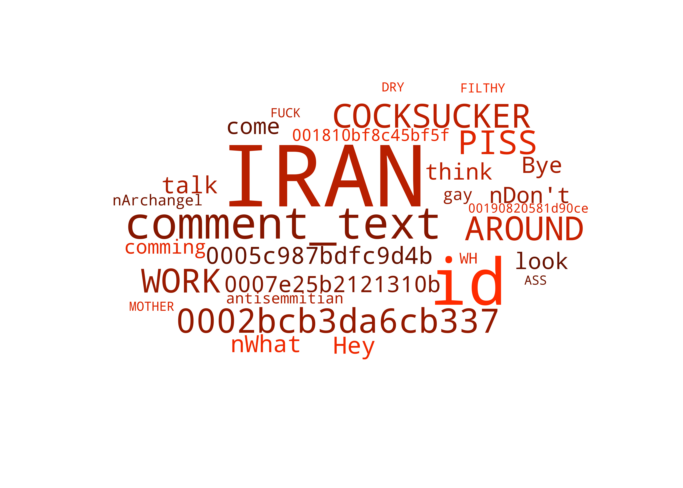

Word Cloud for severe_toxic:


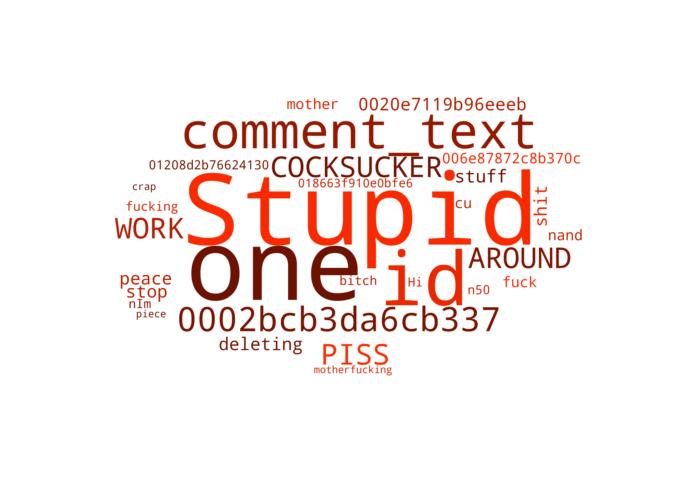

Word Cloud for obscene:


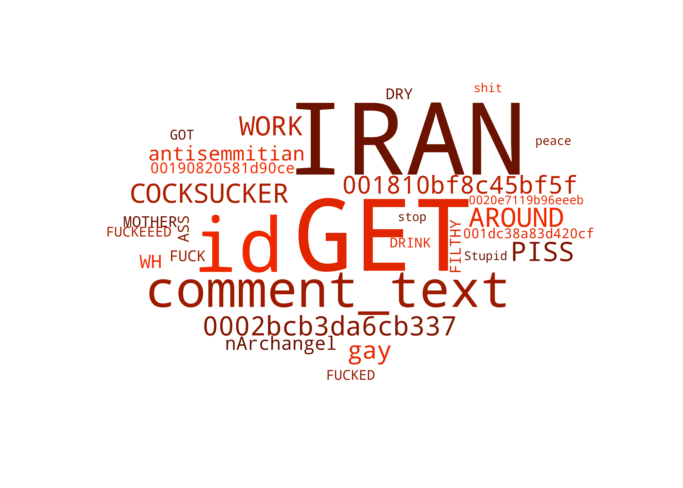

Word Cloud for threat:


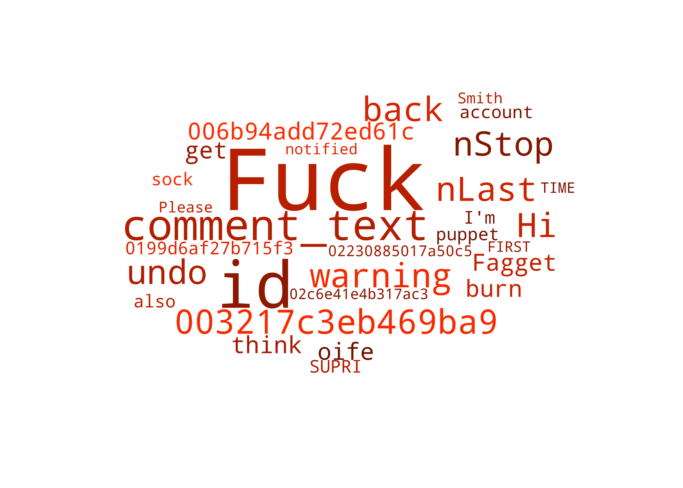

Word Cloud for insult:


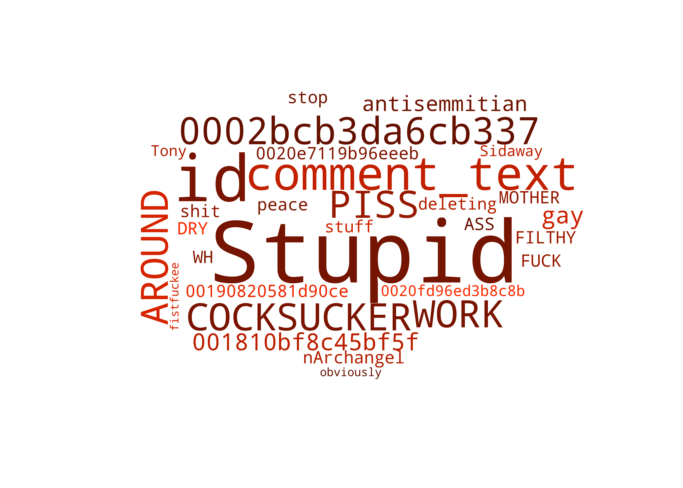

Word Cloud for identity_hate:


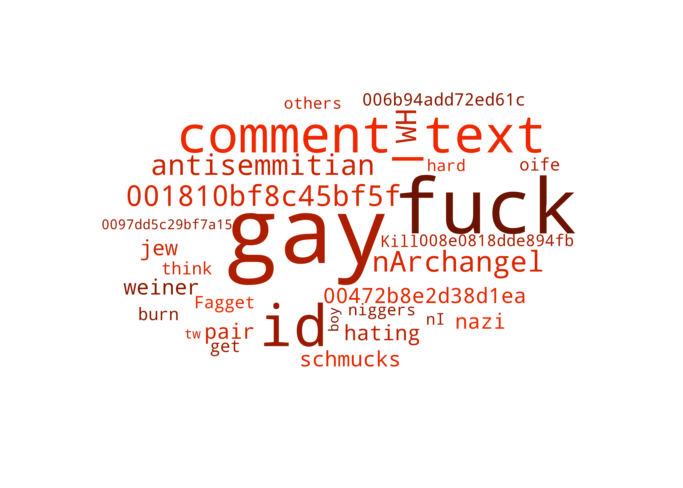

Word Cloud for clean:


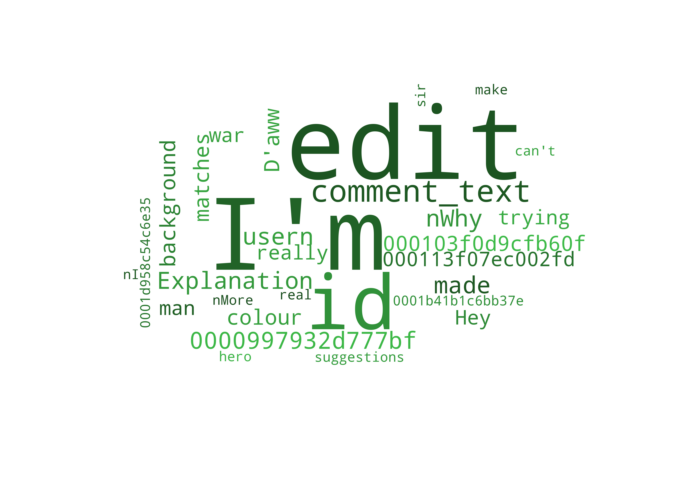

In [13]:
# generate word cloud for each label

for col in cols:
    print("Word Cloud for {}:".format(col))
    if col != 'clean':
        Show_Wordcloud(data=df[df[col]==1], color='red')
    else:
        Show_Wordcloud(data=df[df[col]==1], color='green')

##### Observations:<br> 
    As we can see, the comments need to be processed first.

In [14]:
# drop label_count and export the file to csv

df.drop(['label_count'], axis=1)
df.to_csv('combined_data.csv', index=False)